<a href="https://colab.research.google.com/github/Aimerlee123/Python-TeamProject/blob/aimerlee/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%ED%8C%80_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [85]:
bike=pd.read_csv('/content/drive/MyDrive/data/bicycletimeuse.csv',encoding='cp949')
bike.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,NaN,~10대,1,13.54,0.13,570.00,3
1,2022-12-01,0,1653,1653. 노원역1번출구,정기권,NaN,~10대,1,32.81,0.36,1534.33,12
2,2022-12-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,NaN,~10대,1,19.10,0.17,720.00,4
3,2022-12-01,0,1355,1355. 보문2교,정기권,NaN,~10대,1,10.57,0.08,333.59,3
4,2022-12-01,0,1184,1184. 마곡13단지,정기권,NaN,~10대,1,6.93,0.07,318.20,37


In [86]:
bike['연령대코드']=bike['연령대코드'].str.replace('~',"")
bike.drop('탄소량',axis=1)
bike.drop('운동량',axis=1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,탄소량,이동거리(M),이용시간(분)
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,NaN,10대,1,0.13,570.00,3
1,2022-12-01,0,1653,1653. 노원역1번출구,정기권,NaN,10대,1,0.36,1534.33,12
2,2022-12-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,NaN,10대,1,0.17,720.00,4
3,2022-12-01,0,1355,1355. 보문2교,정기권,NaN,10대,1,0.08,333.59,3
4,2022-12-01,0,1184,1184. 마곡13단지,정기권,NaN,10대,1,0.07,318.20,37
...,...,...,...,...,...,...,...,...,...,...,...
1638964,2022-12-31,23,262,262. 영문초등학교 사거리,정기권,M,기타,1,0.21,920.00,5
1638965,2022-12-31,23,201,201. 진미파라곤 앞,정기권,M,기타,1,0.10,430.88,3
1638966,2022-12-31,23,1008,1008. 암사역 3번출구(국민은행앞),정기권,M,기타,1,0.29,1240.00,7
1638967,2022-12-31,23,1637,1637. KT 전화국 버스정류장 옆,정기권,M,기타,1,2.00,8630.00,87


# 12월 연령별 분석

In [87]:
bike_1 = bike.copy()
bike_1["대여일자"] = pd.to_datetime(bike_1["대여일자"], infer_datetime_format=True)
bike_1['요일'] = bike_1['대여일자'].dt.day_name()
bike_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638969 entries, 0 to 1638968
Data columns (total 13 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   대여일자     1638969 non-null  datetime64[ns]
 1   대여시간     1638969 non-null  int64         
 2   대여소번호    1638969 non-null  int64         
 3   대여소명     1638969 non-null  object        
 4   대여구분코드   1638969 non-null  object        
 5   성별       1112717 non-null  object        
 6   연령대코드    1638969 non-null  object        
 7   이용건수     1638969 non-null  int64         
 8   운동량      1638969 non-null  object        
 9   탄소량      1638969 non-null  object        
 10  이동거리(M)  1638969 non-null  float64       
 11  이용시간(분)  1638969 non-null  int64         
 12  요일       1638969 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 162.6+ MB


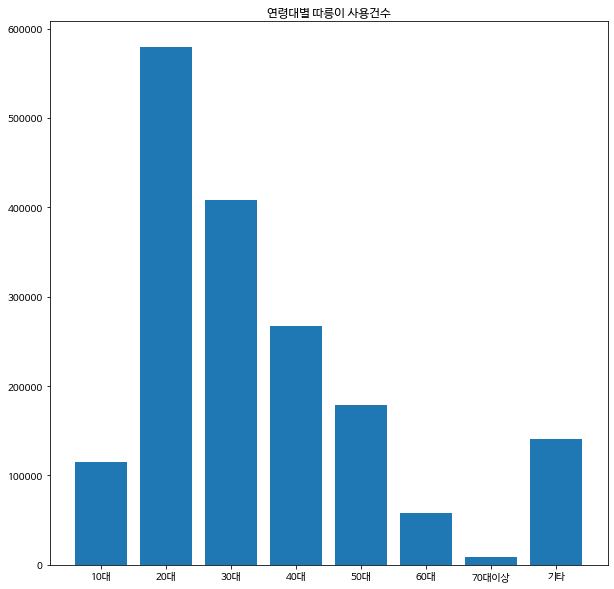

In [88]:
age_group=bike_1.groupby(by=["연령대코드"],as_index=False)
age_sum=age_group["이용건수"].sum()
plt.figure(figsize=(10,10))
plt.title("연령대별 따릉이 사용건수")
plt.bar(age_sum['연령대코드'],age_sum['이용건수'])
plt.show()

In [93]:
bike_1.groupby('연령대코드').agg({'이동거리(M)':['mean'],'이용시간(분)':['mean']})

,평균이동거리,이용시간(분)
,mean,mean
연령대코드,,
10대,1672.143118,17.288176
20대,1695.010435,16.949021
30대,1806.649249,18.515748
40대,2092.629846,20.753097
50대,2261.183805,21.967887
60대,2373.726603,23.753861
70대이상,2223.926263,26.480213
기타,1888.246082,18.741567


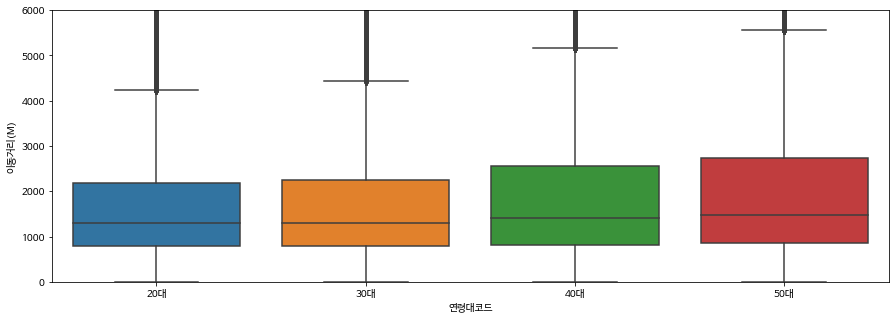

In [92]:
data_2 = bike_1[(bike_1['연령대코드'] != '10대') & (bike_1['연령대코드'] != '60대') & (bike_1['연령대코드'] != '70대')]
plt.figure(figsize=(15, 5))
sns.boxplot(data = data_2, x = '연령대코드', y = '이동거리(M)', order = ['20대', '30대', '40대', '50대'])
plt.ylim([0, 6000]);
plt.show()

In [82]:
##1.6과 2km배수에 정거장을 배치하는 것이 이용객의 편의에 도움이 될 듯하다. 

In [83]:
bike_2=bike.copy()
bike_2.dropna(subset=['성별'],inplace=True)
bike_2['성별']=bike_2['성별'].str.replace('f','F')
bike_2['성별']=bike_2['성별'].str.replace('m','M')
bike_2['평균이동거리'] = bike_2['이동거리(M)'] / bike_2['이용건수']

# 12월 성별분석

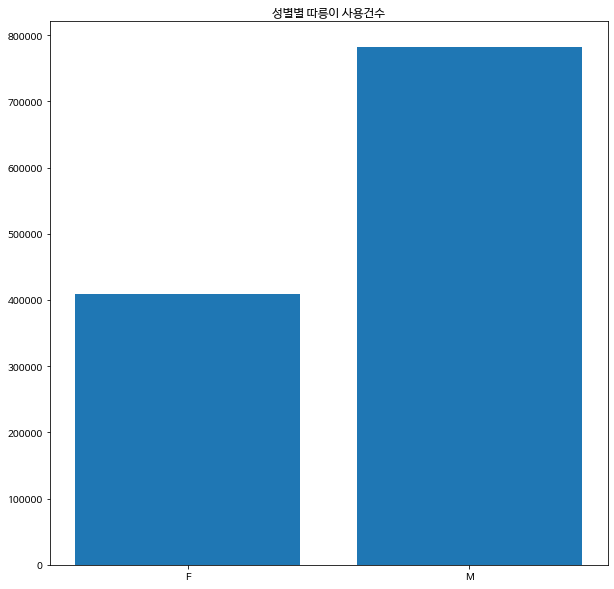

In [84]:
sex_group=bike_2.groupby(["성별"],as_index=False)
sex_sum=sex_group["이용건수"].sum()
plt.figure(figsize=(10,10))
plt.title("성별별 따릉이 사용건수")
plt.bar(sex_sum['성별'],sex_sum['이용건수'])
plt.show()

In [68]:
bike_2.groupby('성별').agg({'평균이동거리':['mean'],'이용시간(분)':['mean']})

,평균이동거리,이용시간(분)
,mean,mean
성별,,
F,1817.476503,19.391378
M,1922.636238,18.625522


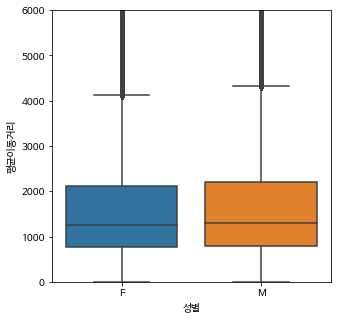

In [95]:
plt.figure(figsize=(5, 5))
sns.boxplot(data = bike_2, x = '성별', y = '평균이동거리', order = ['F','M'])
plt.ylim([0, 6000]);
plt.show()

In [ ]:
#### 남자의 이용량이 더 많기 때문에 이동거리로 요금을 받는 것이 수익성에 도움이 된다. 

In [69]:
df1=bike_2.groupby(['대여구분코드','성별'],as_index=False)['이용건수'].sum()
df1

,대여구분코드,성별,이용건수
0,단체권,F,1620
1,단체권,M,3298
2,일일권,F,40954
3,일일권,M,83848
4,일일권(비회원),F,32
5,일일권(비회원),M,52
6,정기권,F,366777
7,정기권,M,694793


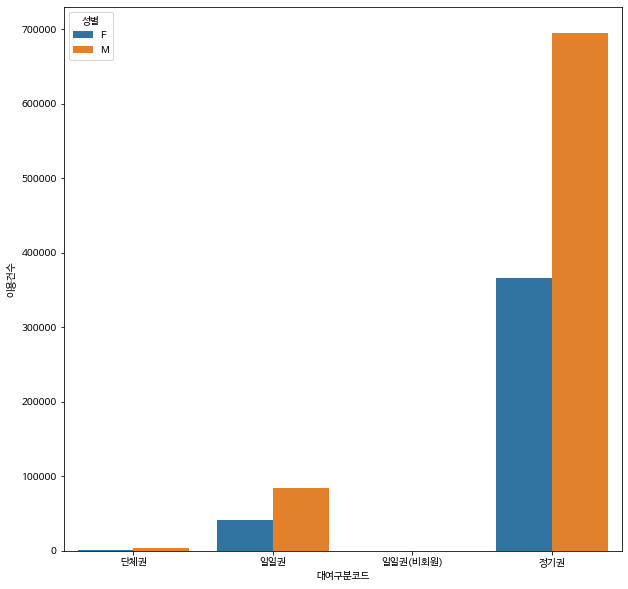

In [70]:
plt.figure(figsize=(10,10))
sns.barplot(x='대여구분코드', y='이용건수', hue='성별',data=df1 )

In [ ]:
## 정기권 이용하는 사람이 가장 많기 때문에 정기권 가격을 높이는 것이 수익성에 도움이 된다. 

In [ ]:
df2=bike_2.groupby(['연령대코드','성별'],as_index=False)['이용건수'].sum()
df2

,연령대코드,성별,이용건수
0,10대,F,24817
1,10대,M,74949
2,20대,F,137356
3,20대,M,203929
4,30대,F,94581
5,30대,M,181504
6,40대,F,60884
7,40대,M,130527
8,50대,F,41012
9,50대,M,84696


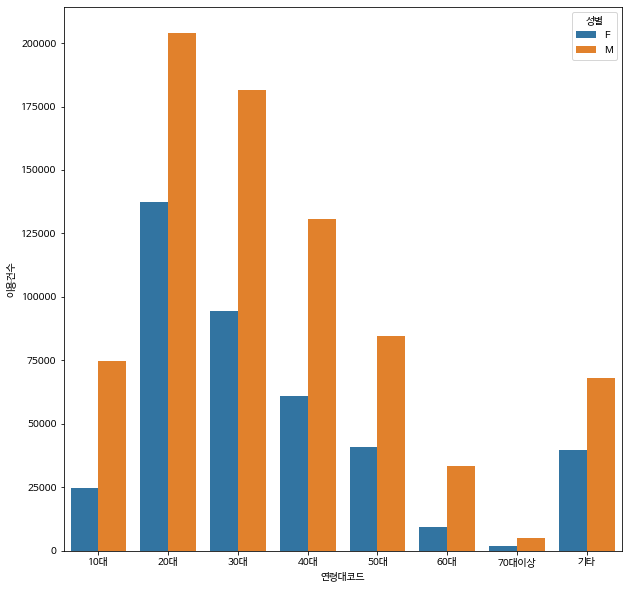

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='연령대코드', y='이용건수', hue='성별',data=df2 )

# 대여구분코드 별 분류

In [101]:
df3=bike_2.groupby(['연령대코드','대여구분코드'],as_index=False)['이용건수'].sum()


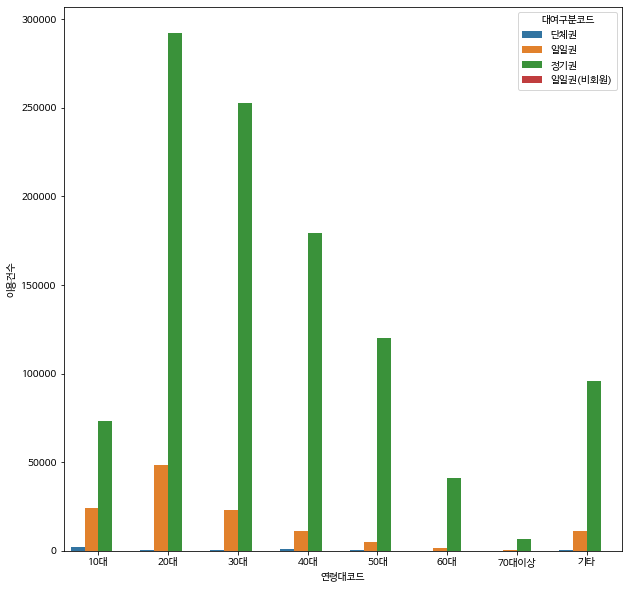

In [100]:
plt.figure(figsize=(10,10))
sns.barplot(x='연령대코드', y='이용건수', hue='대여구분코드',data=df3 )

# 자치구 연령별 인구 분석

In [191]:
guage=pd.read_csv('/content/drive/MyDrive/data/자치구별연령별인구(추계인구).csv')

In [192]:
guage['10대']=guage['10~14세']+guage['15~19세']
guage.drop(['10~14세','15~19세'],axis=1,inplace=True)
guage['20대']=guage['20~24세']+guage['25~29세']
guage.drop(['20~24세','25~29세'],axis=1,inplace=True)
guage['30대']=guage['30~34세']+guage['35~39세']
guage.drop(['30~34세','35~39세'],axis=1,inplace=True)
guage['40대']=guage['40~44세']+guage['45~49세']
guage.drop(['40~44세','45~49세'],axis=1,inplace=True)
guage['50대']=guage['50~54세']+guage['55~59세']
guage.drop(['50~54세','55~59세'],axis=1,inplace=True)
guage['60대']=guage['60~64세']+guage['65~69세']
guage.drop(['60~64세','65~69세'],axis=1,inplace=True)
guage['70대이상']=guage['70~74세']+guage['75~79세']+guage['80~84세']+guage['85~89세']+guage['90~94세']+guage['95세 이상+']
guage.drop(['70~74세','75~79세','80~84세','85~89세','90~94세','95세 이상+'],axis=1,inplace=True)
guage['기타']=guage['0~4세']+guage['5~9세']
guage.drop(['0~4세','5~9세'],axis=1,inplace=True)

In [193]:
guage

,자치구별(1),자치구별(2),성별(1),소계,10대,20대,30대,40대,50대,60대,70대이상,기타
0,합계,소계,계,8539824,367223,908906,1087615,1239037,1134306,1220445,2085432,496860
1,합계,소계,남자,4067598,187382,416792,524339,610158,562504,592637,917640,256146
2,합계,소계,여자,4472226,179841,492114,563276,628879,571802,627808,1167792,240714
3,합계,종로구,계,126884,5170,15338,14885,17630,17318,18548,32033,5962
4,합계,종로구,남자,60470,2567,7013,7057,8424,8750,9388,14239,3032
...,...,...,...,...,...,...,...,...,...,...,...,...
73,합계,송파구,남자,280511,14865,27194,35718,43384,39026,40364,59834,20126
74,합계,송파구,여자,310317,14431,32034,41443,47028,41586,43654,71291,18850
75,합계,강동구,계,411368,19812,38075,48561,60448,56166,60875,101891,25540
76,합계,강동구,남자,197521,10359,18077,23283,29731,27744,29572,45611,13144


In [194]:
guage.drop('자치구별(1)',axis=1,inplace=True)
guage.drop(0,inplace=True)
guage.drop(1,inplace=True)
guage.drop(2,inplace=True)
guage

,자치구별(2),성별(1),소계,10대,20대,30대,40대,50대,60대,70대이상,기타
3,종로구,계,126884,5170,15338,14885,17630,17318,18548,32033,5962
4,종로구,남자,60470,2567,7013,7057,8424,8750,9388,14239,3032
5,종로구,여자,66414,2603,8325,7828,9206,8568,9160,17794,2930
6,중구,계,109853,3256,11731,14724,14955,14737,16426,28412,5612
7,중구,남자,52292,1631,5250,7041,7497,7446,8325,12241,2861
...,...,...,...,...,...,...,...,...,...,...,...
73,송파구,남자,280511,14865,27194,35718,43384,39026,40364,59834,20126
74,송파구,여자,310317,14431,32034,41443,47028,41586,43654,71291,18850
75,강동구,계,411368,19812,38075,48561,60448,56166,60875,101891,25540
76,강동구,남자,197521,10359,18077,23283,29731,27744,29572,45611,13144


In [195]:
dfm=guage[guage['성별(1)']=='남자']
dfm.set_index('자치구별(2)',inplace=True)
dfm

,성별(1),소계,10대,20대,30대,40대,50대,60대,70대이상,기타
자치구별(2),,,,,,,,,,
종로구,남자,60470,2567,7013,7057,8424,8750,9388,14239,3032
중구,남자,52292,1631,5250,7041,7497,7446,8325,12241,2861
용산구,남자,93114,3724,9470,13287,14295,13367,13721,19565,5685
성동구,남자,122664,4790,13532,16977,18691,17298,17727,25088,8561
광진구,남자,143000,6042,17237,20291,21231,19399,20003,30404,8393
동대문구,남자,146912,5817,17214,18677,21309,19887,21733,33439,8836
중랑구,남자,169002,6406,14785,20777,24297,24409,27237,41445,9646
성북구,남자,173576,8142,19292,21051,25934,24154,25135,38331,11537
강북구,남자,122728,4363,10692,13806,17053,17222,20367,33150,6075


In [207]:
dfm_s2=dfm.sort_values('20대',ascending=False)
dfm_s2

,성별(1),소계,10대,20대,30대,40대,50대,60대,70대이상,기타
자치구별(2),,,,,,,,,,
관악구,남자,213312,6199,32309,36151,30147,26505,28568,43606,9827
송파구,남자,280511,14865,27194,35718,43384,39026,40364,59834,20126
강서구,남자,255905,11431,23547,36554,39594,34129,36554,56301,17795
강남구,남자,225189,15540,23300,27000,36925,32099,29119,47056,14150
동작구,남자,169498,6831,20373,23491,24552,22586,24060,37176,10429
노원구,남자,203411,11218,19993,22522,30350,27853,29255,49311,12909
성북구,남자,173576,8142,19292,21051,25934,24154,25135,38331,11537
은평구,남자,202852,9126,18247,24339,29853,28332,31315,48994,12646
강동구,남자,197521,10359,18077,23283,29731,27744,29572,45611,13144


In [196]:
dfw=guage[guage['성별(1)']=='여자']
dfw.set_index('자치구별(2)',inplace=True)
dfw

,성별(1),소계,10대,20대,30대,40대,50대,60대,70대이상,기타
자치구별(2),,,,,,,,,,
종로구,여자,66414,2603,8325,7828,9206,8568,9160,17794,2930
중구,여자,57561,1625,6481,7683,7458,7291,8101,16171,2751
용산구,여자,102766,3585,11679,14450,14795,13554,13991,25320,5392
성동구,여자,135767,4939,15459,18706,19092,17920,18502,32902,8247
광진구,여자,160255,5913,21760,22214,22424,20378,21176,38510,7880
동대문구,여자,156672,5701,19751,19215,20845,19410,21620,41798,8332
중랑구,여자,180849,6120,16922,21163,23133,23900,27623,52984,9004
성북구,여자,196401,8022,23611,22918,27116,24993,27469,51453,10819
강북구,여자,135140,4224,12885,13820,16093,16846,21376,44166,5730


In [208]:
dfw_s2=dfw.sort_values('20대',ascending=False)
dfw_s2

,성별(1),소계,10대,20대,30대,40대,50대,60대,70대이상,기타
자치구별(2),,,,,,,,,,
관악구,여자,218380,6000,37050,31954,26400,24900,28616,54230,9230
송파구,여자,310317,14431,32034,41443,47028,41586,43654,71291,18850
강서구,여자,286037,11163,29808,39129,40276,35521,40109,73005,17026
강남구,여자,251373,14254,28301,32905,42809,32769,32054,55367,12914
동작구,여자,187558,6615,23741,24452,24772,23709,25962,48425,9882
성북구,여자,196401,8022,23611,22918,27116,24993,27469,51453,10819
마포구,여자,175952,6854,23236,26699,26703,22273,21756,38300,10131
광진구,여자,160255,5913,21760,22214,22424,20378,21176,38510,7880
은평구,여자,231588,8709,21483,27008,31707,30398,35114,65250,11919
